# Контрольная работа по дискриминантному анализу

## Волки и собаки

### Введение

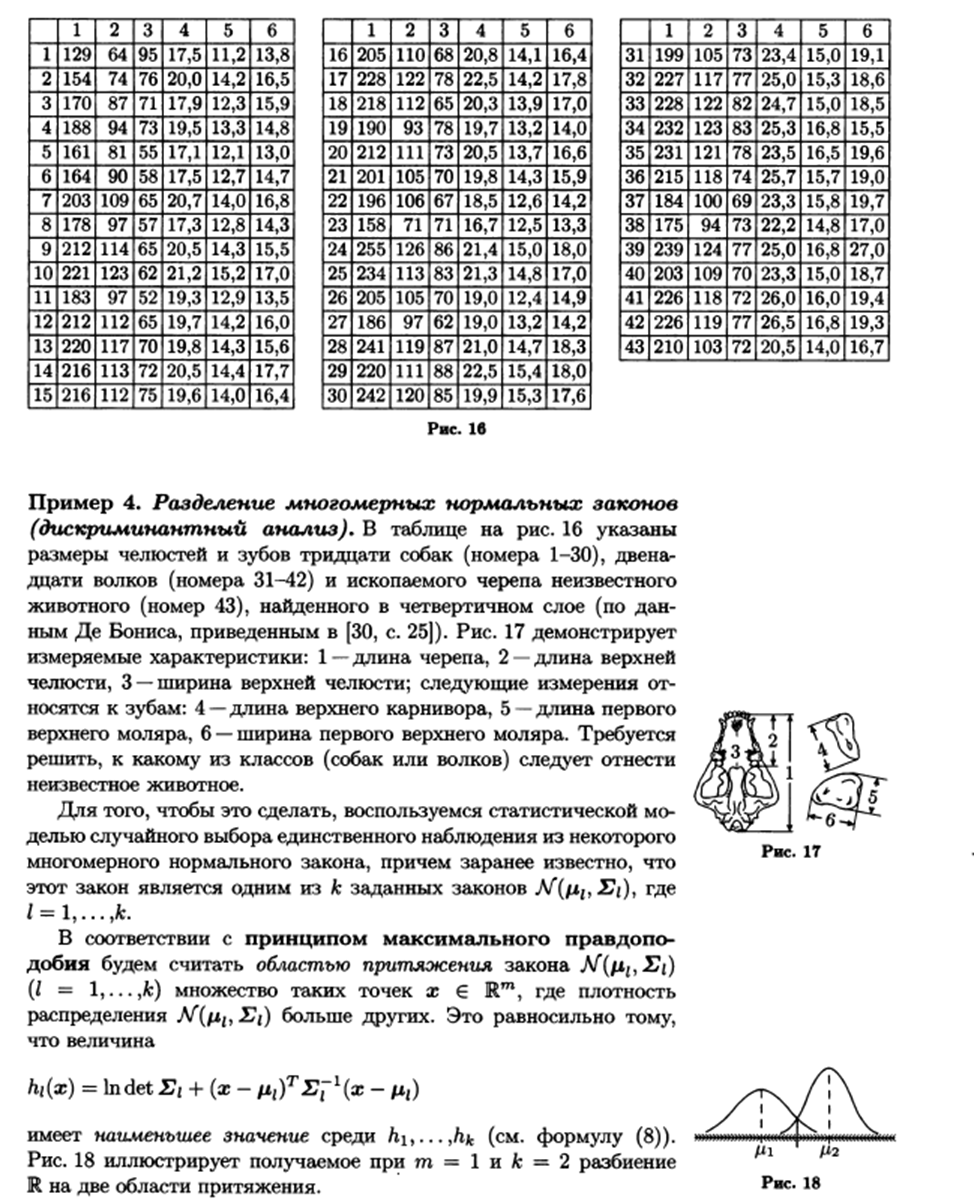

Измеряемые характеристики:

---

1.   длина черепа (skull length)
2.   длина верхней челюсти (maxilla length)
3.   ширина верхней челюсти (upper jaw width)

Следующие измерения относятся к зубам:
4.   длина верхнего карнивора (top carnivore length)
5.   длина первого верхнего моляра (length of the first upper molar)
6.   ширина первого верхнего моляра (width of the first upper molar)


> **ЗАДАЧА: Определить, к какому из классов (собак или волков) следует отнести неизвестное животное.**


### Предварительный анализ

In [12]:
import numpy as np

features = np.array(
          [#1.   2.   3.   4.    5.    6.
           [129., 64., 95., 17.5, 11.2, 13.8],
           [154., 74., 76., 20.0, 14.2, 16.5],
           [170., 87., 71., 17.9, 12.3, 15.9],
           [188., 94., 73., 19.5, 13.3, 14.8],
           [161., 81., 55., 17.1, 12.1, 13.0],
           [164., 90., 58., 17.5, 12.7, 14.7],
           [203., 109., 65., 20.7, 14.0, 16.8],
           [178., 97., 57., 17.3, 12.8, 14.3],
           [212., 114., 65., 20.5, 14.3, 15.5],
           [221., 123., 62., 21.2, 15.2, 17.0],
           [183., 97., 52., 19.3, 12.9, 13.5],
           [212., 112., 65., 19.7, 14.2, 16.0],
           [220., 117., 70., 19.8, 14.3, 15.6],
           [216., 113., 72., 20.5, 14.4, 17.7],
           [216., 112., 75., 19.6, 14.0, 16.4],
           [205., 110., 68., 20.8, 14.1, 16.4],
           [228., 122., 78., 22.5, 14.2, 17.8],
           [218., 112., 78., 22.5, 14.2, 17.0],
           [190., 93., 78., 19.7, 13.2, 14.0],
           [212., 111., 73., 20.5, 13.7, 16.6],
           [201., 105., 70., 19.8, 14.3, 15.9],
           [196., 106., 67., 18.5, 12.6, 14.2],
           [158., 71., 71., 16.7, 12.5, 13.3],
           [255., 126., 86., 21.4, 15.0, 18.0],
           [234., 113., 83., 21.3, 14.8, 17.0],
           [205., 105., 70., 19.0, 13.2, 14.9],
           [186., 97., 62., 19.0, 13.2, 14.2],
           [241., 119., 87., 21.0, 14.7, 18.3],
           [220., 111., 88., 22.5, 15.4, 18.0],
           [242., 120., 85., 19.9, 15.3, 17.6],
           [199., 105., 73., 23.4, 15.0, 19.1],
           [227., 117., 77., 25.0, 15.3, 18.6],
           [228., 122., 82., 24.7, 15.0, 18.5],
           [232., 123., 83., 25.3, 16.8, 15.5],
           [231., 121., 78., 23.5, 16.5, 19.6],
           [215., 118., 74., 25.7, 15.7, 19.0],
           [184., 100., 69., 23.3, 15.8, 19.7],
           [175., 94., 73., 22.2, 14.8, 17.0],
           [239., 124., 77., 25.0, 16.8, 27.0],
           [203., 109., 70., 23.3, 15.0, 18.7],
           [226., 118., 72., 26.0, 16.0, 19.4],
           [226., 119., 77., 26.5, 16.8, 19.3],
           [210., 103., 72., 20.5, 14.0, 16.7]
          ])

Class = np.array(["Dogs", "Dogs", "Dogs", "Dogs", "Dogs", "Dogs", "Dogs", "Dogs",
                  "Dogs", "Dogs", "Dogs", "Dogs", "Dogs", "Dogs", "Dogs", "Dogs",
                  "Dogs", "Dogs", "Dogs", "Dogs", "Dogs", "Dogs", "Dogs", "Dogs",
                  "Dogs", "Dogs", "Dogs", "Dogs", "Dogs", "Dogs", "Wolves",
                  "Wolves", "Wolves", "Wolves", "Wolves", "Wolves", "Wolves",
                  "Wolves", "Wolves", "Wolves", "Wolves", "Wolves", "?"])
Class_number = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

Class_names_train = ["Собаки", "Волки"]

names = ['sk_len', 'jaw_len', 'jaw_wid', 'carn_len', 'mol_len', 'mol_wid']
f_names = ['sk_len', 'jaw_len', 'jaw_wid', 'carn_len', 'mol_len', 'mol_wid', 'class']

feature_names = ['1. длина черепа', '2. длина верхней челюсти', 
                 '3. ширина верхней челюсти', '4. длина верхнего карнивора', 
                 '5. длина первого верхнего моляра', '6. ширина первого верхнего моляра']

In [13]:
data = []
for i in range(len(features)):
  part = []
  for j in range(len(features[i])):
    part.append(features[i][j])
  part.append(Class_number[i])
  data.append(part)

data = np.array(data)

import pandas as pd

datafr = pd.DataFrame(data, columns=f_names)
print(datafr)

    sk_len  jaw_len  jaw_wid  carn_len  mol_len  mol_wid  class
0    129.0     64.0     95.0      17.5     11.2     13.8    0.0
1    154.0     74.0     76.0      20.0     14.2     16.5    0.0
2    170.0     87.0     71.0      17.9     12.3     15.9    0.0
3    188.0     94.0     73.0      19.5     13.3     14.8    0.0
4    161.0     81.0     55.0      17.1     12.1     13.0    0.0
5    164.0     90.0     58.0      17.5     12.7     14.7    0.0
6    203.0    109.0     65.0      20.7     14.0     16.8    0.0
7    178.0     97.0     57.0      17.3     12.8     14.3    0.0
8    212.0    114.0     65.0      20.5     14.3     15.5    0.0
9    221.0    123.0     62.0      21.2     15.2     17.0    0.0
10   183.0     97.0     52.0      19.3     12.9     13.5    0.0
11   212.0    112.0     65.0      19.7     14.2     16.0    0.0
12   220.0    117.0     70.0      19.8     14.3     15.6    0.0
13   216.0    113.0     72.0      20.5     14.4     17.7    0.0
14   216.0    112.0     75.0      19.6  

In [14]:
import pandas as pd

dataframe = pd.DataFrame(features, columns=names)
print(dataframe)

    sk_len  jaw_len  jaw_wid  carn_len  mol_len  mol_wid
0    129.0     64.0     95.0      17.5     11.2     13.8
1    154.0     74.0     76.0      20.0     14.2     16.5
2    170.0     87.0     71.0      17.9     12.3     15.9
3    188.0     94.0     73.0      19.5     13.3     14.8
4    161.0     81.0     55.0      17.1     12.1     13.0
5    164.0     90.0     58.0      17.5     12.7     14.7
6    203.0    109.0     65.0      20.7     14.0     16.8
7    178.0     97.0     57.0      17.3     12.8     14.3
8    212.0    114.0     65.0      20.5     14.3     15.5
9    221.0    123.0     62.0      21.2     15.2     17.0
10   183.0     97.0     52.0      19.3     12.9     13.5
11   212.0    112.0     65.0      19.7     14.2     16.0
12   220.0    117.0     70.0      19.8     14.3     15.6
13   216.0    113.0     72.0      20.5     14.4     17.7
14   216.0    112.0     75.0      19.6     14.0     16.4
15   205.0    110.0     68.0      20.8     14.1     16.4
16   228.0    122.0     78.0   

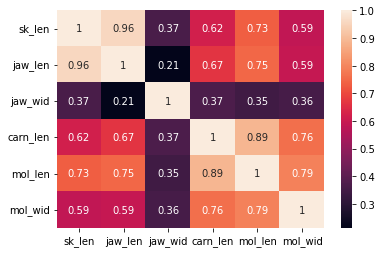

In [15]:
import seaborn as sns

sns.heatmap(dataframe[['sk_len', 'jaw_len', 'jaw_wid', 'carn_len', 'mol_len', 'mol_wid']].corr(), annot=True)

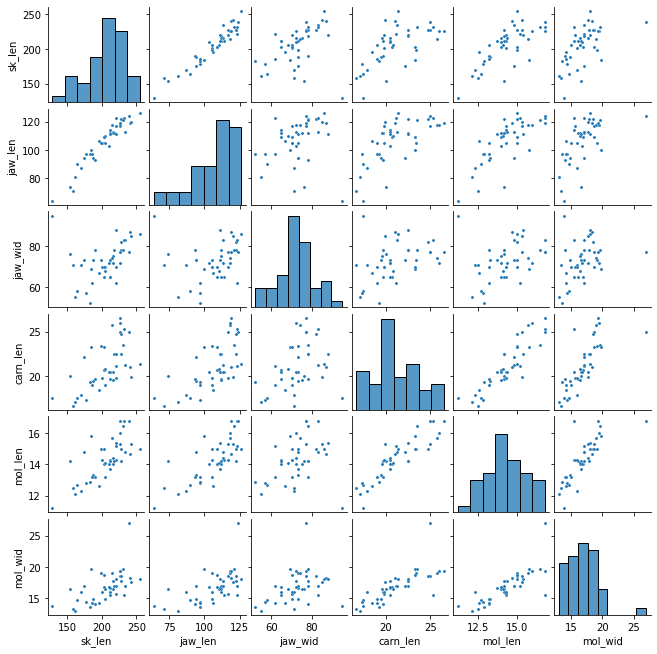

In [16]:
import matplotlib.pyplot as plt
g = sns.pairplot(dataframe, plot_kws={"s": 10})
g.fig.set_size_inches(9, 9)
plt.show()

In [17]:
data_train = dataframe[0:42]
data_test = dataframe[42:]
print(data_test)
class_train = Class[0:42]
class_test = Class[42]
print(class_test)

    sk_len  jaw_len  jaw_wid  carn_len  mol_len  mol_wid
42   210.0    103.0     72.0      20.5     14.0     16.7
?


In [18]:
print(len(data_test))

1




> **Важность признаков (```RandomForestClassifier```)**



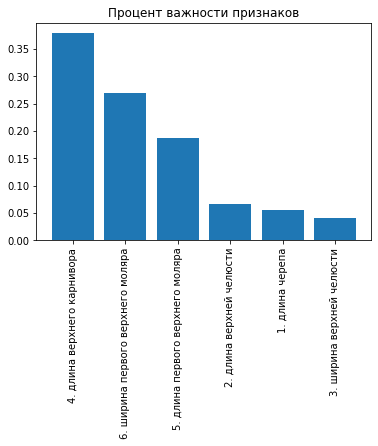

In [45]:
from scipy.sparse.construct import random
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

randomforest = RandomForestClassifier(random_state=0, n_jobs=-1) # создать объект-классификатор случайного леса
model = randomforest.fit(dataframe, Class) # натренировать модель
importances = model.feature_importances_ # вычислить важности признаков
indices = np.argsort(importances)[::-1] # отсортировать важности признаков в нисходящем порядке

# Перераспределить имена признаков, чтобы они совпадали
# с отсортированными важностями признаков
f_names = [feature_names[i] for i in indices]
plt.figure()
plt.title("Процент важности признаков") 
plt.bar(range(dataframe.shape[1]), importances[indices]) # добавить столбики
plt.xticks(range(dataframe.shape[1]), f_names, rotation=90) # добавить имена признаков как метки оси X

plt.show()

Можно попробовать создать 3D-график из данных следующих признаков:


*   длина черепа
*   длина верхней челюсти
*   длина верхнего карнивора



### Стандартизация

In [20]:
import math
from sklearn import preprocessing

def scale_feature(df):
  scaled = preprocessing.StandardScaler().fit_transform(df)
  scaled = pd.DataFrame(scaled, columns=df.columns)
  return scaled

In [21]:
df_scaled = preprocessing.scale(dataframe)

In [22]:
df_scaled

array([[-2.81170638e+00, -2.86440623e+00,  2.46932628e+00,
        -1.40216742e+00, -2.37886433e+00, -1.23658181e+00],
       [-1.88623659e+00, -2.18987465e+00,  3.52390739e-01,
        -4.30323464e-01, -9.21765612e-02, -1.27098440e-01],
       [-1.29393591e+00, -1.31298358e+00, -2.04697561e-01,
        -1.24667239e+00, -1.54041215e+00, -3.73650300e-01],
       [-6.27597659e-01, -8.40811468e-01,  1.81377586e-02,
        -6.24692255e-01, -7.78182892e-01, -8.25662044e-01],
       [-1.62710504e+00, -1.71770253e+00, -1.98738012e+00,
        -1.55766245e+00, -1.69285800e+00, -1.56531762e+00],
       [-1.51604867e+00, -1.11062410e+00, -1.65312714e+00,
        -1.40216742e+00, -1.23552045e+00, -8.66754020e-01],
       [-7.23157796e-02,  1.70985914e-01, -8.73203522e-01,
        -1.58207156e-01, -2.44622412e-01, -3.82250946e-03],
       [-9.97785579e-01, -6.38451992e-01, -1.76454480e+00,
        -1.47991494e+00, -1.15929752e+00, -1.03112193e+00],
       [ 2.60853348e-01,  5.08251709e-01, -8.732

In [23]:
print(len(df_scaled))
print(len(df_scaled[0]))


43
6


### LDA

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
model = lda.fit(df_scaled, Class)

In [25]:
model.coef_

array([[10.62976584, -9.39892337, -1.76332538,  0.27956631, -2.07453307,
         0.21209151],
       [ 1.45847913,  0.06408048,  0.26747381, -2.7109961 , -0.64600601,
        -0.36069066],
       [-4.53201164,  0.62304241, -0.52174073,  6.75419306,  1.78789278,
         0.88405235]])

In [26]:
scores = pd.DataFrame(model.transform(df_scaled), columns = ["Factor_1", "Factor_2"])
scores.head()

,Factor_1,Factor_2
0,-1.619307,-2.305879
1,1.196495,0.544244
2,-1.988302,-0.074175
3,-1.258864,0.650690
4,-2.370478,1.456916


In [27]:
scores

,Factor_1,Factor_2
0,-1.619307,-2.305879
1,1.196495,0.544244
2,-1.988302,-0.074175
3,-1.258864,0.650690
4,-2.370478,1.456916
5,-1.695835,-1.195760
6,-0.194893,-0.281502
7,-2.487318,-1.037948
8,-0.787365,-0.682727
9,0.039015,-1.704037


No handles with labels found to put in legend.


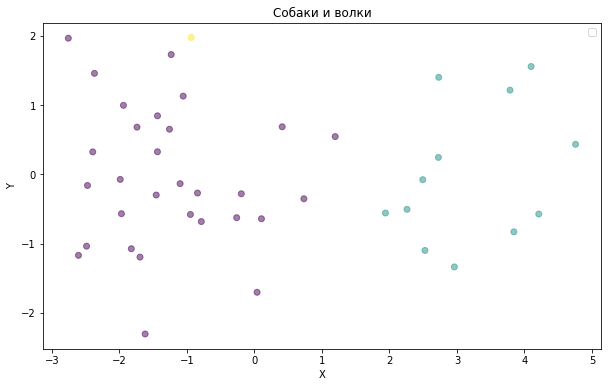

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(scores["Factor_1"], scores["Factor_2"], alpha=0.5, c=Class_number, cmap='viridis')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("Собаки и волки")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



*   Фиолетовый – собаки
*   Голубой – волки
*   Жёлтый – ??? (но если приглядеться, то можно заметить, что визуально он относится к собакам)

In [30]:
data_train = dataframe[0:42]
data_test = dataframe[42:]
print(data_train)
print(data_test)
class_train = Class[0:42]
class_test = Class[42]
print(class_test)

    sk_len  jaw_len  jaw_wid  carn_len  mol_len  mol_wid
0    129.0     64.0     95.0      17.5     11.2     13.8
1    154.0     74.0     76.0      20.0     14.2     16.5
2    170.0     87.0     71.0      17.9     12.3     15.9
3    188.0     94.0     73.0      19.5     13.3     14.8
4    161.0     81.0     55.0      17.1     12.1     13.0
5    164.0     90.0     58.0      17.5     12.7     14.7
6    203.0    109.0     65.0      20.7     14.0     16.8
7    178.0     97.0     57.0      17.3     12.8     14.3
8    212.0    114.0     65.0      20.5     14.3     15.5
9    221.0    123.0     62.0      21.2     15.2     17.0
10   183.0     97.0     52.0      19.3     12.9     13.5
11   212.0    112.0     65.0      19.7     14.2     16.0
12   220.0    117.0     70.0      19.8     14.3     15.6
13   216.0    113.0     72.0      20.5     14.4     17.7
14   216.0    112.0     75.0      19.6     14.0     16.4
15   205.0    110.0     68.0      20.8     14.1     16.4
16   228.0    122.0     78.0   

In [31]:
lda_train = LinearDiscriminantAnalysis()
model = lda_train.fit(data_train, class_train)

In [32]:
lda_new = [210., 103., 72., 20.5, 14.0, 16.7]
# make a prediction
yhat = lda_train.predict([lda_new])
print(yhat)
# summarize prediction
if yhat == "Dogs":
  print('Предсказанный класс: %s' % Class_names_train[0])
elif yhat == "Wolves":
  print('Предсказанный класс: %s' % Class_names_train[1])

['Dogs']
Предсказанный класс: Собаки


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# import plotly.express as px

# fig = plt.figure()

# #fig = px.scatter_3d(features, x=features[:,0], y=features[:,1], z=features[:,3], color=Class)
# fig = px.scatter_3d(df_scaled, x=df_scaled[:,1], y=df_scaled[:,0], z=df_scaled[:,3], color=Class)
# #fig = px.scatter_3d(dataframe, x=dataframe["sk_len"], y=dataframe["jaw_len"], z=dataframe["carn_len"], color=Class)

# fig.update_layout(scene = dict(
#                     xaxis_title='Длина верхней челюсти',
#                     yaxis_title='Длина черепа',
#                     zaxis_title='Длина верхнего карнивора'),
#                     width=700,
#                     margin=dict(r=20, b=10, l=10, t=10))

# fig.show()

In [35]:
data_tr = datafr[0:42]
#data_test = datafr[42:]
print(data_tr)
#print(datafr)

    sk_len  jaw_len  jaw_wid  carn_len  mol_len  mol_wid  class
0    129.0     64.0     95.0      17.5     11.2     13.8    0.0
1    154.0     74.0     76.0      20.0     14.2     16.5    0.0
2    170.0     87.0     71.0      17.9     12.3     15.9    0.0
3    188.0     94.0     73.0      19.5     13.3     14.8    0.0
4    161.0     81.0     55.0      17.1     12.1     13.0    0.0
5    164.0     90.0     58.0      17.5     12.7     14.7    0.0
6    203.0    109.0     65.0      20.7     14.0     16.8    0.0
7    178.0     97.0     57.0      17.3     12.8     14.3    0.0
8    212.0    114.0     65.0      20.5     14.3     15.5    0.0
9    221.0    123.0     62.0      21.2     15.2     17.0    0.0
10   183.0     97.0     52.0      19.3     12.9     13.5    0.0
11   212.0    112.0     65.0      19.7     14.2     16.0    0.0
12   220.0    117.0     70.0      19.8     14.3     15.6    0.0
13   216.0    113.0     72.0      20.5     14.4     17.7    0.0
14   216.0    112.0     75.0      19.6  

In [36]:
print(len(data_tr))

42


In [37]:
D = 3

df_t=data_tr[['sk_len', 'jaw_len', 'jaw_wid', 'carn_len', 'mol_len', 'mol_wid']]
#df_t.columns=['sk_len', 'jaw_len', 'jaw_wid', 'carn_len', 'mol_len', 'mol_wid']
xxxx=df_t.iloc[:,0:6]
print(xxxx.values)
#xxxx=df_t[['0','1']].values
y=data_tr['class']


def lda_qda(field1, field2, type_model,k,D): #процедура рисования "решающих поверхностей"
    splot=plt.subplot(D,D,k)
    #x=df_t[[field1, field2]].values #определим данные
    x=df_t.iloc[:,[field1,field2]].values #определим данные
    df_t['class']=y #определим результирующий признак
    #выберем метод анализа: линейный или квадратичный
    model=type_model
    #построим модель
    model.fit(x,y)
    #определим минимальные и максимальные значения в данных для большей информативности диаграмм
    min1, max1 = df_t.iloc[:,field1].min()-1, df_t.iloc[:,field1].max()+1
    min2, max2 = df_t.iloc[:,field2].min()-1, df_t.iloc[:,field2].max()+1
    #определим все строки и столбцы области отрисовки
    X = np.linspace(min1, max1, 200)
    Y = np.linspace(min2, max2, 200)
    X, Y = np.meshgrid(X, Y)
    # #определим значения "решающих поверхностей"
    ZZ = np.array([model.predict(np.array([[xx, yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y))])
    Z = ZZ.reshape(X.shape)  #преобразуем значения в вектор
    #отрисуем поверхности и данные
    plt.pcolormesh(X, Y, Z,cmap='Pastel1')
    #Выведем значения
    plt.scatter(df_t.iloc[:,field1],df_t.iloc[:,field2],c=df_t['class'])
    #оценка точности модели
    plt.title(model.score(x,y))
    return splot

[[129.   64.   95.   17.5  11.2  13.8]
 [154.   74.   76.   20.   14.2  16.5]
 [170.   87.   71.   17.9  12.3  15.9]
 [188.   94.   73.   19.5  13.3  14.8]
 [161.   81.   55.   17.1  12.1  13. ]
 [164.   90.   58.   17.5  12.7  14.7]
 [203.  109.   65.   20.7  14.   16.8]
 [178.   97.   57.   17.3  12.8  14.3]
 [212.  114.   65.   20.5  14.3  15.5]
 [221.  123.   62.   21.2  15.2  17. ]
 [183.   97.   52.   19.3  12.9  13.5]
 [212.  112.   65.   19.7  14.2  16. ]
 [220.  117.   70.   19.8  14.3  15.6]
 [216.  113.   72.   20.5  14.4  17.7]
 [216.  112.   75.   19.6  14.   16.4]
 [205.  110.   68.   20.8  14.1  16.4]
 [228.  122.   78.   22.5  14.2  17.8]
 [218.  112.   78.   22.5  14.2  17. ]
 [190.   93.   78.   19.7  13.2  14. ]
 [212.  111.   73.   20.5  13.7  16.6]
 [201.  105.   70.   19.8  14.3  15.9]
 [196.  106.   67.   18.5  12.6  14.2]
 [158.   71.   71.   16.7  12.5  13.3]
 [255.  126.   86.   21.4  15.   18. ]
 [234.  113.   83.   21.3  14.8  17. ]
 [205.  105.   70.   19. 

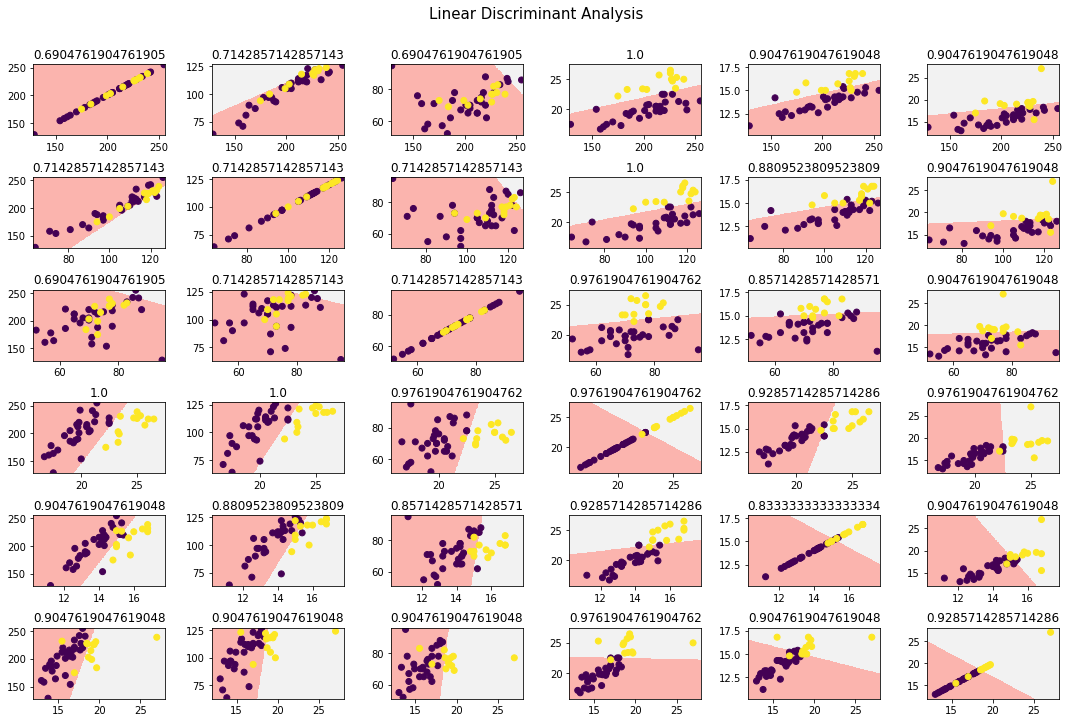

In [38]:
D=6
plt.figure(figsize=(15, 10), facecolor='white')
plt.suptitle('Linear Discriminant Analysis', y=1, fontsize=15)

scores = []

k=0
for i in range(D):
  for j in range(D):
    k=k+1 
    splot=lda_qda(i, j, LinearDiscriminantAnalysis(), k, D) 
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [257]:
from sklearn.model_selection import cross_val_score
import numpy as np

#evaluate model
scores = cross_val_score(lda, data_train, class_train, scoring='accuracy')
print(np.mean(scores))  

0.9777777777777779


### QDA

In [39]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

qda = QuadraticDiscriminantAnalysis()
model = qda.fit(data_train, class_train)
#model = qda.fit(features, Class)

In [258]:
#evaluate model
scores = cross_val_score(qda, data_train, class_train, scoring='accuracy')
print(np.mean(scores))   

0.8861111111111111


In [41]:
qda_new = [210., 103., 72., 20.5, 14.0, 16.7]
# make a prediction
yhat = qda.predict([qda_new])
# summarize prediction
if yhat == "Dogs":
  print('Предсказанный класс: %s' % Class_names_train[0])
elif yhat == "Wolves":
  print('Предсказанный класс: %s' % Class_names_train[1])

Предсказанный класс: Собаки


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but QuadraticDiscriminantAnalysis was fitted with feature names



/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear



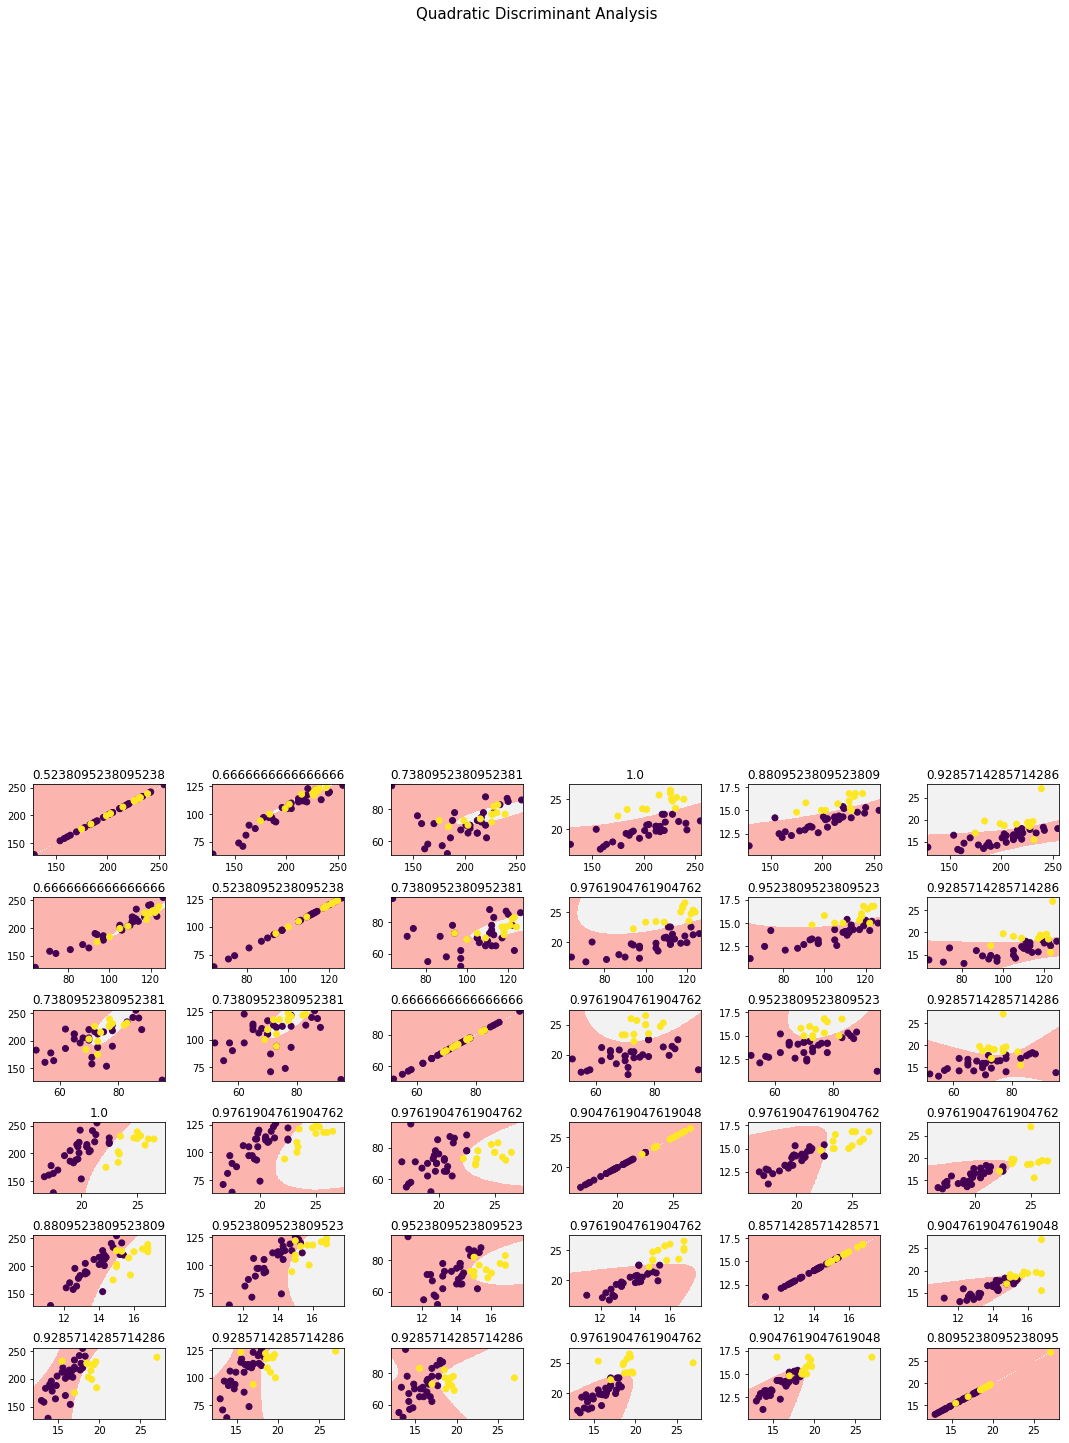

In [42]:
D=6
plt.figure(figsize=(15, 10), facecolor='white')
plt.suptitle('Quadratic Discriminant Analysis', y=2, fontsize=15)

scores = []

k=0
for i in range(D):
  for j in range(D):
    k=k+1 
    splot=lda_qda(i, j, QuadraticDiscriminantAnalysis(), k, D) 
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### Factor Analysis & LDA



> FA



In [43]:
from sklearn.decomposition import FactorAnalysis

In [108]:
fa = FactorAnalysis(n_components=3)
df_scaled = preprocessing.scale(dataframe)
fa.fit(df_scaled)

FactorAnalysis(n_components=3)

In [109]:
pd.DataFrame(fa.components_, columns=dataframe.columns)

,sk_len,jaw_len,jaw_wid,carn_len,mol_len,mol_wid
0,-0.983270,-0.979689,-0.331732,-0.708725,-0.798995,-0.646694
1,-0.106657,-0.061406,0.245608,0.636728,0.509514,0.502033
2,0.087474,-0.128773,0.748742,-0.051472,-0.027640,0.041475


Фактор_1: sk_len, jaw_len, carn_len, mol_len, mol_wid

Фактор_2: -

Фактор_3: jaw_wid

In [110]:
print('Уникальность: ')
pd.Series(fa.noise_variance_, dataframe.columns)

Уникальность: 


sk_len      0.014388
jaw_len     0.019816
jaw_wid     0.267342
carn_len    0.090482
mol_len     0.100727
mol_wid     0.327666
dtype: float64

Исходя из результатов остаточной дисперсии, то можно попробовать создать 3D-график из данных следующих признаков:
*   длина черепа (sk_len)
*   длина верхней челюсти (jaw_len)
*   длина верхнего карнивора (carn_len)

*Почему?* Потому что они лучше всего описаны


In [126]:
import plotly.express as px

fig = plt.figure()
fig = px.scatter_3d(dataframe, x=dataframe["sk_len"], y=dataframe["jaw_len"], z=dataframe["carn_len"], color=Class)
fig.update_layout(scene = dict(
                    xaxis_title='Длина верхней челюсти',
                    yaxis_title='Длина черепа',
                    zaxis_title='Длина верхнего карнивора'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

<Figure size 432x288 with 0 Axes>

In [112]:
scores = pd.DataFrame(fa.transform(df_scaled), columns = ["Factor_1", "Factor_2", "Factor_3"])
scores.head()

,Factor_1,Factor_2,Factor_3
0,2.787790,0.816466,2.158454
1,1.851533,1.734406,0.888258
2,1.354101,-0.365287,0.261100
3,0.745971,-0.231521,0.479966
4,1.745679,-0.634313,-0.697337


In [113]:
scores

,Factor_1,Factor_2,Factor_3
0,2.787790,0.816466,2.158454
1,1.851533,1.734406,0.888258
2,1.354101,-0.365287,0.261100
3,0.745971,-0.231521,0.479966
4,1.745679,-0.634313,-0.697337
5,1.405899,-0.426954,-1.242890
6,0.005832,-0.314195,-0.851805
7,0.958197,-1.007061,-1.293264
8,-0.298244,-0.685312,-0.907773
9,-0.767929,-0.518735,-1.600060


> LDA



In [119]:
lda = LinearDiscriminantAnalysis(n_components=2)
model = lda.fit(scores, Class)

In [120]:
model.coef_

array([[ 0.74008127, -2.09801989,  1.10086608],
       [ 1.03827483, -2.45912787,  0.56748961],
       [-2.6573605 ,  6.32265466, -1.51046287]])

In [122]:
result_lda = pd.DataFrame(model.transform(scores), columns = ["Factor_1", "Factor_2"])
result_lda.head()

,Factor_1,Factor_2
0,-1.774480,1.525138
1,1.517010,0.541700
2,-2.032059,-0.145279
3,-1.344702,0.268804
4,-2.449832,-1.281584


No handles with labels found to put in legend.


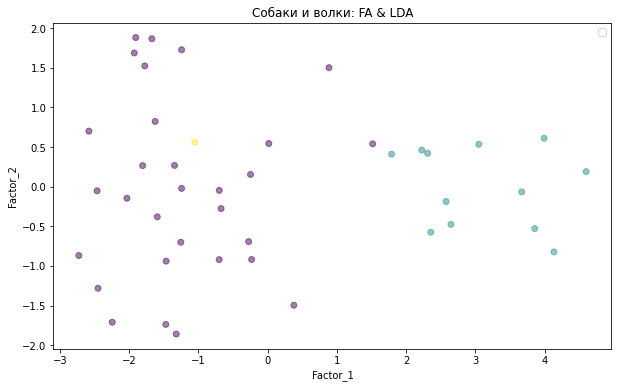

In [125]:
plt.figure(figsize=(10, 6))
plt.scatter(result_lda["Factor_1"], result_lda["Factor_2"], alpha=0.5, c=Class_number, cmap='viridis')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("Собаки и волки: FA & LDA")
plt.xlabel('Factor_1')
plt.ylabel('Factor_2')
plt.show()

In [146]:
scores_train = result_lda[0:42]

In [181]:
len(scores_train)

42

In [182]:
scores_tr = []
#[[scores_train["Factor_1"], scores_train["Factor_2"], datafr["class"]] for i in range(len(features[0])-5)]
for i in range(len(scores_train)):
  part = []
  part.append(scores_train["Factor_1"][i])
  part.append(scores_train["Factor_2"][i])
  part.append(datafr["class"][i])
  scores_tr.append(part)
scores_tr = np.array(scores_tr)

In [183]:
scores_tr = pd.DataFrame(scores_tr, columns=['Factor_1', 'Factor_2', 'class'])
print(scores_tr)

    Factor_1  Factor_2  class
0  -1.774480  1.525138    0.0
1   1.517010  0.541700    0.0
2  -2.032059 -0.145279    0.0
3  -1.344702  0.268804    0.0
4  -2.449832 -1.281584    0.0
5  -1.470564 -1.737317    0.0
6  -0.231162 -0.918073    0.0
7  -2.245008 -1.709763    0.0
8  -0.699918 -0.920202    0.0
9   0.378910 -1.495474    0.0
10 -1.320263 -1.859426    0.0
11 -1.253994 -0.700685    0.0
12 -1.593553 -0.379544    0.0
13 -0.698647 -0.046097    0.0
14 -1.805281  0.266846    0.0
15 -0.273575 -0.692755    0.0
16 -0.247073  0.155122    0.0
17  0.016897  0.545317    0.0
18 -1.624843  0.824058    0.0
19 -1.243028 -0.021071    0.0
20 -0.672233 -0.275734    0.0
21 -2.726929 -0.867792    0.0
22 -2.582249  0.701568    0.0
23 -1.904773  1.882561    0.0
24 -1.242601  1.729016    0.0
25 -2.463489 -0.051527    0.0
26 -1.466947 -0.938955    0.0
27 -1.672058  1.866973    0.0
28  0.886174  1.502417    0.0
29 -1.926317  1.688257    0.0
30  2.578022 -0.186782    1.0
31  2.226033  0.462827    1.0
32  1.7903

In [185]:
D = 3

df_t=scores_tr[['Factor_1', 'Factor_2']]
#df_t.columns=['sk_len', 'jaw_len', 'jaw_wid', 'carn_len', 'mol_len', 'mol_wid']
xxxx=df_t.iloc[:,0:3]
print(xxxx.values)
#xxxx=df_t[['0','1']].values
y=scores_tr['class']


def lda_qda(field1, field2, type_model,k,D): #процедура рисования "решающих поверхностей"
    splot=plt.subplot(D,D,k)
    #x=df_t[[field1, field2]].values #определим данные
    x=df_t.iloc[:,[field1,field2]].values #определим данные
    df_t['class']=y #определим результирующий признак
    #выберем метод анализа: линейный или квадратичный
    model=type_model
    #построим модель
    model.fit(x,y)
    #определим минимальные и максимальные значения в данных для большей информативности диаграмм
    min1, max1 = df_t.iloc[:,field1].min()-1, df_t.iloc[:,field1].max()+1
    min2, max2 = df_t.iloc[:,field2].min()-1, df_t.iloc[:,field2].max()+1
    #определим все строки и столбцы области отрисовки
    X = np.linspace(min1, max1, 200)
    Y = np.linspace(min2, max2, 200)
    X, Y = np.meshgrid(X, Y)
    # #определим значения "решающих поверхностей"
    ZZ = np.array([model.predict(np.array([[xx, yy]])) for xx, yy in zip(np.ravel(X), np.ravel(Y))])
    Z = ZZ.reshape(X.shape)  #преобразуем значения в вектор
    #отрисуем поверхности и данные
    plt.pcolormesh(X, Y, Z,cmap='Pastel1')
    #Выведем значения
    plt.scatter(df_t.iloc[:,field1],df_t.iloc[:,field2],c=df_t['class'])
    #оценка точности модели
    plt.title(model.score(x,y))
    return splot

[[-1.77447965  1.52513806]
 [ 1.51700986  0.54170024]
 [-2.03205927 -0.14527933]
 [-1.34470176  0.26880372]
 [-2.44983156 -1.28158386]
 [-1.47056379 -1.73731673]
 [-0.23116169 -0.91807277]
 [-2.24500766 -1.70976308]
 [-0.69991843 -0.92020151]
 [ 0.37891022 -1.49547415]
 [-1.32026282 -1.85942639]
 [-1.25399381 -0.70068508]
 [-1.59355335 -0.3795445 ]
 [-0.69864676 -0.04609694]
 [-1.80528136  0.26684551]
 [-0.27357469 -0.69275456]
 [-0.24707256  0.15512209]
 [ 0.01689682  0.5453165 ]
 [-1.62484297  0.82405805]
 [-1.24302819 -0.0210708 ]
 [-0.67223333 -0.27573427]
 [-2.72692896 -0.86779234]
 [-2.58224911  0.70156801]
 [-1.90477291  1.88256097]
 [-1.24260136  1.72901566]
 [-2.46348876 -0.05152682]
 [-1.46694686 -0.93895483]
 [-1.67205764  1.86697292]
 [ 0.88617368  1.50241663]
 [-1.92631672  1.68825699]
 [ 2.57802173 -0.18678243]
 [ 2.22603322  0.46282678]
 [ 1.79032627  0.41140669]
 [ 3.05078022  0.53445219]
 [ 2.31059153  0.42216083]
 [ 3.8585303  -0.52871494]
 [ 4.13602242 -0.82205233]
 

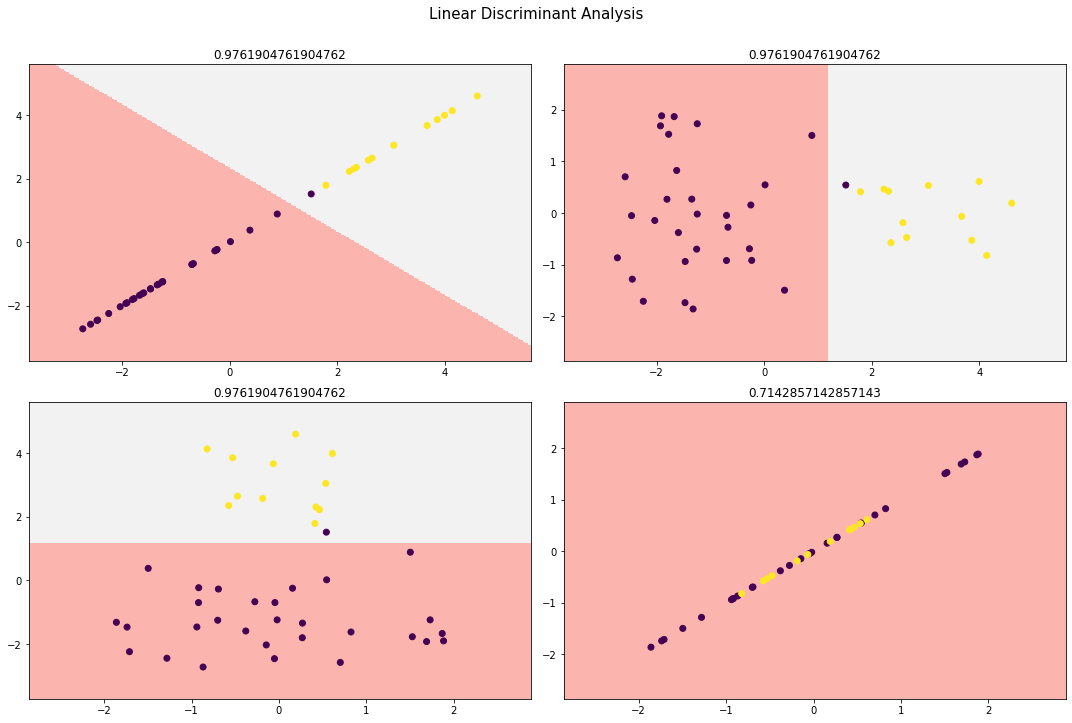

In [188]:
D=2
plt.figure(figsize=(15, 10), facecolor='white')
plt.suptitle('Linear Discriminant Analysis', y=1, fontsize=15)

scores = []

k=0
for i in range(D):
  for j in range(D):
    k=k+1 
    splot=lda_qda(i, j, LinearDiscriminantAnalysis(), k, D) 
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### Factor Analysis & QDA



> FA



In [133]:
from sklearn.decomposition import FactorAnalysis

In [134]:
fa = FactorAnalysis(n_components=3)
df_scaled = preprocessing.scale(dataframe)
fa.fit(df_scaled)

FactorAnalysis(n_components=3)

In [135]:
pd.DataFrame(fa.components_, columns=dataframe.columns)

,sk_len,jaw_len,jaw_wid,carn_len,mol_len,mol_wid
0,-0.983270,-0.979689,-0.331732,-0.708725,-0.798995,-0.646694
1,-0.106657,-0.061406,0.245608,0.636728,0.509514,0.502033
2,0.087474,-0.128773,0.748742,-0.051472,-0.027640,0.041475


Фактор_1: sk_len, jaw_len, carn_len, mol_len, mol_wid

Фактор_2: -

Фактор_3: jaw_wid

In [141]:
scores = pd.DataFrame(fa.transform(df_scaled), columns = ["Factor_1", "Factor_2", "Factor_3"])
scores.head()

,Factor_1,Factor_2,Factor_3
0,2.787790,0.816466,2.158454
1,1.851533,1.734406,0.888258
2,1.354101,-0.365287,0.261100
3,0.745971,-0.231521,0.479966
4,1.745679,-0.634313,-0.697337


In [142]:
scores

,Factor_1,Factor_2,Factor_3
0,2.787790,0.816466,2.158454
1,1.851533,1.734406,0.888258
2,1.354101,-0.365287,0.261100
3,0.745971,-0.231521,0.479966
4,1.745679,-0.634313,-0.697337
5,1.405899,-0.426954,-1.242890
6,0.005832,-0.314195,-0.851805
7,0.958197,-1.007061,-1.293264
8,-0.298244,-0.685312,-0.907773
9,-0.767929,-0.518735,-1.600060


> QDA



In [144]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

scores_train = scores[0:42]
qda = QuadraticDiscriminantAnalysis()
model = qda.fit(scores_train, class_train)

In [145]:
#evaluate model
scores = cross_val_score(qda, scores_train, class_train, scoring='accuracy')
print(np.mean(scores))   

0.975


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning:

Variables are collinear



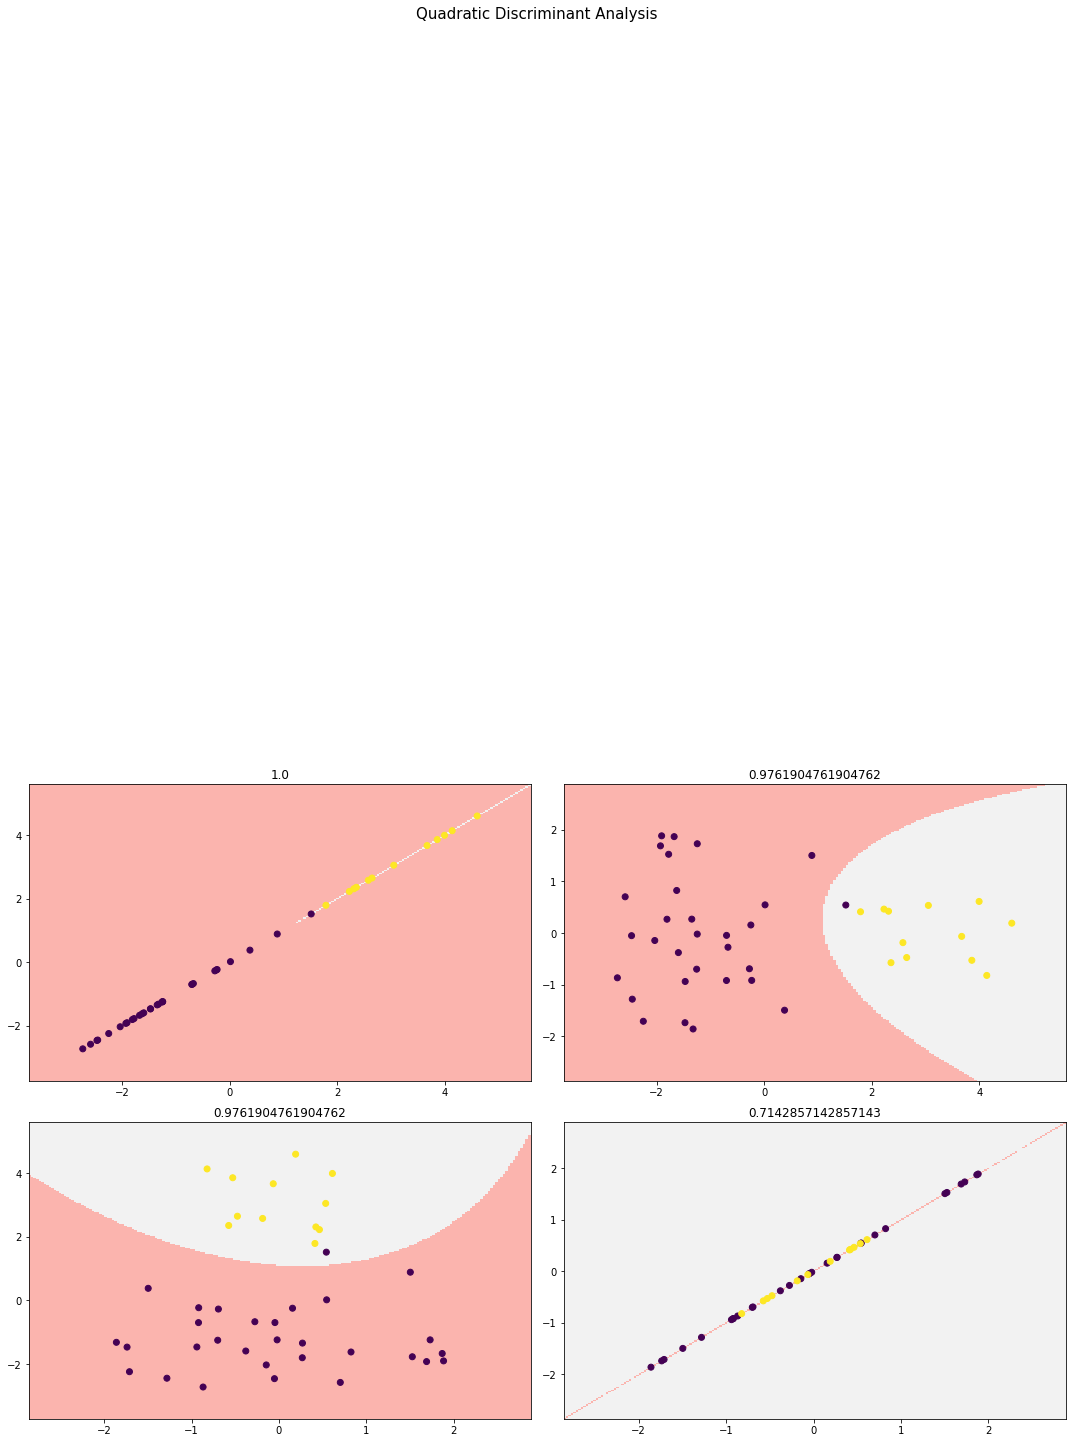

In [190]:
D=2
plt.figure(figsize=(15, 10), facecolor='white')
plt.suptitle('Quadratic Discriminant Analysis', y=2, fontsize=15)

scores = []

k=0
for i in range(D):
  for j in range(D):
    k=k+1 
    splot=lda_qda(i, j, QuadraticDiscriminantAnalysis(), k, D) 
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

## Рак молочной железы

### Введение

**10 действительных признаков вычисляются для каждого ядра клетки:**
*   радиус (среднее расстояние от центра до точек по периметру)
*   текстура (стандартное отклонение значений оттенков серого)
*   периметр
*   площадь
*   гладкость (локальное изменение длины радиуса)
*   компактность (периметр² / площадь - 1,0)
*   вогнутость (выраженность вогнутых участков контура)
*   вогнутые точки (количество вогнутых частей контура)
*   симметрия
*   фрактальная размерность («приближение береговой линии» - 1)

**Каждый из этих 10 признаков делится ещё на 3:**
*   Среднее значение `(mean)`
*   Стандартная ошибка `(se)`
*   «Наихудшее» или наибольшее (среднее из трех самых больших значений) `(worst)`

*В итоге имеем 30 признаков. *

Например, среди столбцов: признак 3 - средний радиус, признак 13 - радиус стандартной ошибки (SE), признак 23 - наихудший радиус.

### Предварительный анализ

Загружаем данные и отображаем их такими, какие они есть

In [191]:
from google.colab import drive
drive.mount('/content/drive')

import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

df_BCW = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PRACTICE/BREAST_CANCER_WISCONSIN/data.csv', low_memory=False)
df_BCW

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [192]:
Class = df_BCW['diagnosis']

In [193]:
np.unique(Class)

array(['B', 'M'], dtype=object)

*   B – Benign – Доброкачественная опухоль
*   M – Malignant – Злокачественная опухоль 

---

Отбрасываем столбцы, состоящие из пропусков

In [194]:
df_BCW = df_BCW.filter(regex='^(?!.*Unnamed).*$')
df_BCW.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Убираем столбец с диагнозами (M, B)

In [195]:
df_BCW = df_BCW[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
                'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
                'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
df_BCW.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Описательная статистика говорит о том, что есть выбросы (если сравнить столбец с максимальным значениями (max) и столбец со средними значениями (mean)).

Следовательно, нужно будет провести стандартизацю данных (см. ниже)


In [196]:
df_BCW.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Отображаем коэффициенты корреляции (через тепловую карту)

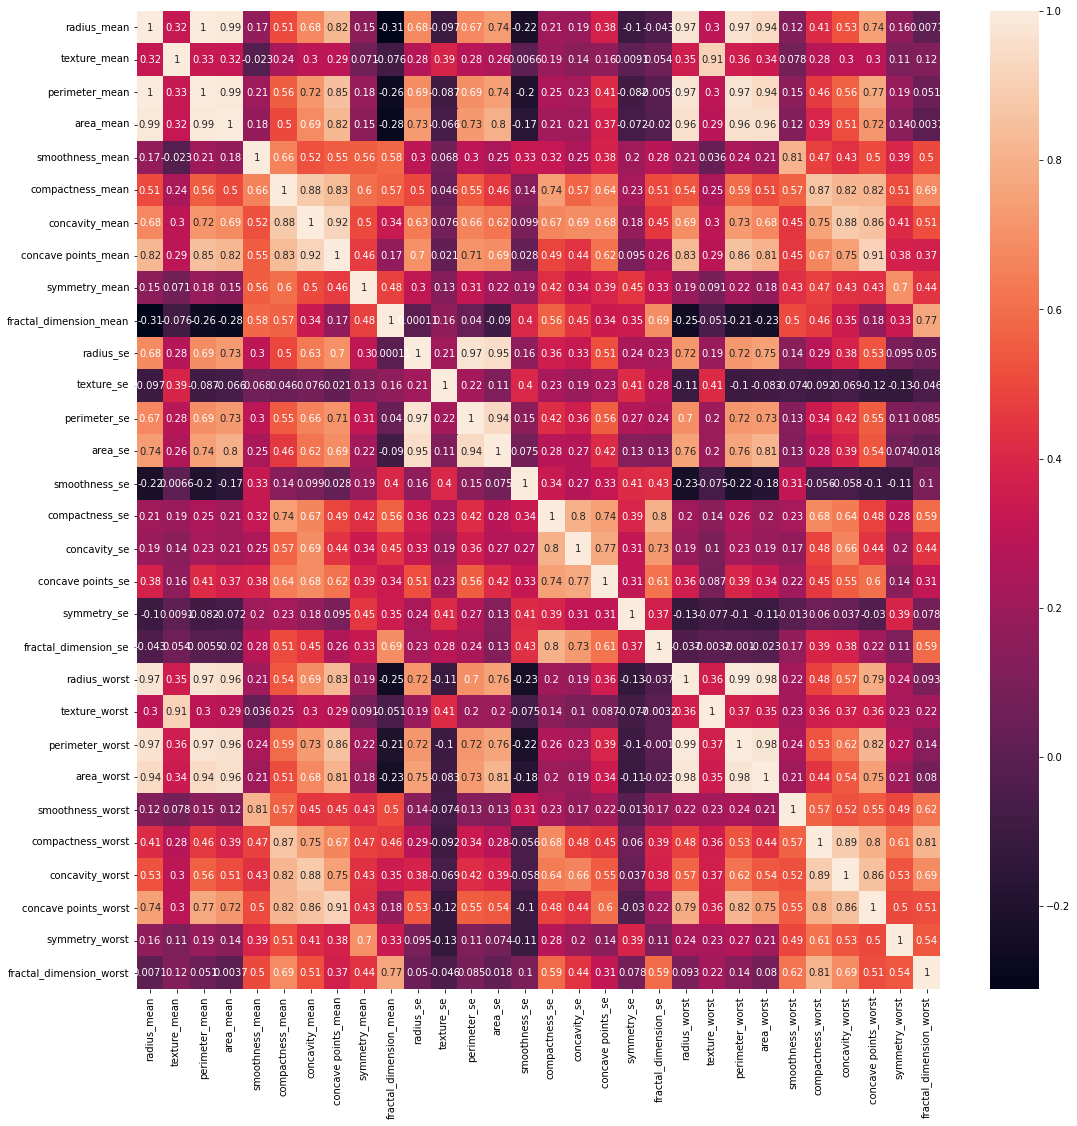

In [197]:
plt.figure(figsize = (18, 18))

ax = sns.heatmap(df_BCW.corr(), annot=True)

Если посмотреть на данные, то можно заметить хорошую корреляцию (от 0.7 до 0.99) и не очень (стремится к 0)

Судя по таблице корреляции всего можно попробовать собрать 3 фактора:


*   mean
*   se
*   worst

Но это не точно...



### Стандартизация

In [198]:
df_scaled = preprocessing.scale(df_BCW)

### Factor Analysis

Теперь тоже самое, но для факторного анализа

In [199]:
from sklearn.decomposition import FactorAnalysis

In [232]:
fa = FactorAnalysis(n_components=10)
fa.fit(df_scaled)

FactorAnalysis(n_components=10)

*Далее мы видим табличку, благодаря которой факторный анализ преобрёл звание "плохой статистики"*

In [234]:
pd.DataFrame(fa.components_, columns=df_BCW.columns).T

,0,1,2,3,4,5,6,7,8,9
radius_mean,0.981054,0.119551,-0.048352,-0.138439,-0.017387,0.030831,0.005810,0.009380,-0.003960,0.001481
texture_mean,0.354115,-0.632241,-0.532331,-0.191764,0.137577,0.075086,-0.023734,0.025389,-0.010675,-0.066843
perimeter_mean,0.981599,0.101474,-0.023240,-0.156827,0.022295,0.009630,0.010928,-0.008607,0.000031,-0.001210
area_mean,0.975827,0.124810,-0.053890,-0.074143,0.069354,0.082564,0.088180,0.004479,-0.006590,0.017760
smoothness_mean,0.212523,-0.163591,0.406542,-0.109100,0.339735,-0.155452,-0.057013,-0.430829,0.368818,0.082983
compactness_mean,0.542423,-0.239735,0.390310,-0.309612,0.440727,-0.336772,-0.001648,-0.231369,0.052466,-0.106145
concavity_mean,0.700195,-0.158842,0.255271,-0.272386,0.457846,-0.271067,0.069747,0.057532,0.160809,0.086932
concave points_mean,0.840026,-0.071829,0.206466,-0.206494,0.297628,-0.148704,0.002256,-0.131981,0.209066,0.043915
symmetry_mean,0.187201,-0.314953,0.582158,-0.229203,0.299665,0.166430,-0.045617,-0.096515,0.215820,-0.091418
fractal_dimension_mean,-0.255104,-0.283199,0.439871,-0.107464,0.530298,-0.325430,0.069110,-0.234634,0.147189,-0.159851


---
Уникальность фич в смысле дисперсии остатков, объяснённой факторами (чем больше, тем хуже объясняется факторами) содержится в атрибуте `noise_variance_`.


In [235]:
print('Уникальность: ')
pd.Series(fa.noise_variance_, df_BCW.columns)

Уникальность: 


radius_mean                0.000346
texture_mean               0.124362
perimeter_mean             0.000246
area_mean                  0.004000
smoothness_mean            0.279538
compactness_mean           0.024894
concavity_mean             0.020447
concave points_mean        0.030172
symmetry_mean              0.290489
fractal_dimension_mean     0.155516
radius_se                  0.005614
texture_se                 0.394793
perimeter_se               0.034036
area_se                    0.030434
smoothness_se              0.534425
compactness_se             0.057037
concavity_se               0.063247
concave points_se          0.235772
symmetry_se                0.298825
fractal_dimension_se       0.219599
radius_worst               0.000058
texture_worst              0.001795
perimeter_worst            0.006619
area_worst                 0.000367
smoothness_worst           0.339218
compactness_worst          0.019813
concavity_worst            0.017864
concave points_worst       0

Наконец, сами факторы (как новые векторы-фичи) можно получить, применив метод `transform`.

In [236]:
# scores = pd.DataFrame(fa.transform(df_scaled), columns = ["Factor_1", "Factor_2", "Factor_3", "Factor_4", "Factor_5", "Factor_6", "Factor_7", "Factor_8",
#                                                           "Factor_9", "Factor_10", "Factor_11", "Factor_12", "Factor_13", "Factor_14", "Factor_15", "Factor_16",
#                                                           "Factor_17", "Factor_18", "Factor_19", "Factor_20", "Factor_21", "Factor_22", "Factor_23", "Factor_24",
#                                                           "Factor_25", "Factor_26", "Factor_27", "Factor_28", "Factor_29", "Factor_30"])
scores = pd.DataFrame(fa.transform(df_scaled), columns = ["Factor_1", "Factor_2", "Factor_3", "Factor_4", "Factor_5", "Factor_6", "Factor_7", "Factor_8",
                                                          "Factor_9", "Factor_10"])
#scores = pd.DataFrame(fa.transform(df_scaled), columns = ["Factor_1", "Factor_2"])
scores.head()

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10
0,1.740921,-0.359162,4.070347,2.177790,1.274057,-0.646636,-1.012097,-1.380136,-0.142138,0.074590
1,1.791309,1.075857,-0.048940,0.906343,-1.467598,0.262983,1.035324,0.640294,0.170046,-1.078069
2,1.533859,0.221945,1.006345,-0.457763,0.045662,0.473905,-0.006839,-0.164512,0.376576,-0.197951
3,-0.372909,-3.179905,5.347513,-1.465307,0.697740,1.043187,-1.254245,-1.345767,-0.489824,-1.457261
4,1.407522,2.538516,0.189555,-0.774401,0.514111,-0.145469,-0.000052,0.318783,0.914999,0.870458


In [237]:
scores

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10
0,1.740921,-0.359162,4.070347,2.177790,1.274057,-0.646636,-1.012097,-1.380136,-0.142138,0.074590
1,1.791309,1.075857,-0.048940,0.906343,-1.467598,0.262983,1.035324,0.640294,0.170046,-1.078069
2,1.533859,0.221945,1.006345,-0.457763,0.045662,0.473905,-0.006839,-0.164512,0.376576,-0.197951
3,-0.372909,-3.179905,5.347513,-1.465307,0.697740,1.043187,-1.254245,-1.345767,-0.489824,-1.457261
4,1.407522,2.538516,0.189555,-0.774401,0.514111,-0.145469,-0.000052,0.318783,0.914999,0.870458
...,...,...,...,...,...,...,...,...,...,...
564,1.974263,1.407598,-1.146651,0.380993,1.716699,0.335504,-0.389002,0.338949,1.278429,1.772979
565,1.581049,-0.517241,-2.044432,-0.514988,0.145168,0.899334,-0.268003,0.562588,0.956712,-0.076176
566,0.586555,-0.259289,-1.903111,-0.608705,0.024637,-0.808403,-0.457061,0.519022,-0.992886,-0.445447
567,1.961440,-1.942982,0.485845,-1.744051,0.719995,-1.615602,-0.565279,-0.992232,-0.847261,0.538555


In [238]:
import plotly.express as px
import matplotlib.pyplot as plt


fig = plt.figure()
fig = px.scatter_3d(scores, x=scores["Factor_1"], y=scores["Factor_2"], z=scores["Factor_3"], color=Class)
fig.update_layout(scene = dict(
                    xaxis_title='Factor_1',
                    yaxis_title='Factor_2',
                    zaxis_title='Factor_3'),
                    width=700,
                    margin=dict(r=20, b=10, l=10, t=10))

fig.show()

<Figure size 432x288 with 0 Axes>

*   B – Benign – Доброкачественная опухоль
*   M – Malignant – Злокачественная опухоль 

---

### LDA

In [247]:
lda = LinearDiscriminantAnalysis()
model = lda.fit(df_scaled, Class)

In [245]:
model.coef_

array([[-1.44833568e+01,  3.68957962e-01,  1.08865782e+01,
         2.11087855e+00,  2.24784150e-02, -4.20809820e+00,
         2.10328313e+00,  1.56846323e+00,  5.31387551e-02,
         4.43195602e-03,  2.27635626e+00, -7.03616573e-02,
        -8.59307158e-01, -7.92601536e-01,  8.98376566e-01,
         2.19353267e-02, -2.03117873e+00,  1.23061216e+00,
         2.64794590e-01, -3.56875236e-01,  1.78035220e+01,
         8.30445328e-01, -1.54420617e+00, -1.08656797e+01,
         2.33917449e-01,  1.99413370e-01,  1.50083483e+00,
         5.75986366e-01,  6.50095283e-01,  1.46687628e+00]])

In [251]:
result_lda = pd.DataFrame(model.transform(df_scaled), columns = ["Factor_1"])
result_lda.head()

,Factor_1
0,3.323927
1,2.319108
2,3.747425
3,4.048549
4,2.281158


In [253]:
from sklearn.model_selection import cross_val_score
import numpy as np

#evaluate model
scores = cross_val_score(lda, df_scaled, Class, scoring='accuracy')
print(np.mean(scores))  

0.9595870206489675


Вывод: данная выборка (рак молочной железы) не подходит для исследования через дискриминантный анализ, так как всего находится 1 фактор (пробовала через LDA)

### QDA

In [254]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 

qda = QuadraticDiscriminantAnalysis()
model = qda.fit(df_scaled, Class)

In [256]:
scores = cross_val_score(qda, df_scaled, Class, scoring='accuracy')
print(np.mean(scores)) 

0.9578171091445427
